In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-club/train.csv
/kaggle/input/shai-club/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv("../input/shai-club/test.csv")
train = pd.read_csv("../input/shai-club/train.csv")
train_len = len(train)
test_len = len(test)
print("train length is ", train_len)
print("test length is ", test_len)

train length is  43152
test length is  10788


In [4]:
id = test['Id']

In [5]:
train['price'].isna().any()

False

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

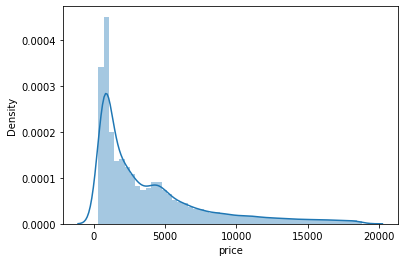

In [6]:
sns.distplot(train['price'])

In [7]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
train.drop(train[train ['x']==0].index,inplace=True)
train.drop(train[train ['y']==0].index,inplace=True)
train.drop(train[train ['z']==0].index,inplace=True)

In [9]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,21577.642796,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,12456.553482,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,10789.500000,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,21578.000000,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,32364.500000,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:

train_len = len(train)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

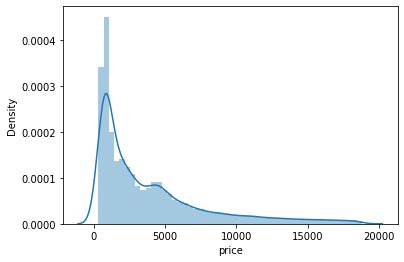

In [11]:
#train['price'] = np.log(train['price'])
sns.distplot(train['price'])

In [12]:
y=train['price']

In [13]:
df = pd.concat([train, test],axis = 0)

df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50


In [14]:
df=df.drop("Id",axis=1)

df.drop("price",axis=1 ,inplace=True)
print(df.shape)

(53923, 9)


In [15]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z
10783,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07
10787,2.00,Premium,F,SI2,61.5,59.0,8.03,7.95,4.92


In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z
53918,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
53919,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
53920,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
53921,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07
53922,2.00,Premium,F,SI2,61.5,59.0,8.03,7.95,4.92


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53923 entries, 0 to 53922
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53923 non-null  float64
 1   cut      53923 non-null  object 
 2   color    53923 non-null  object 
 3   clarity  53923 non-null  object 
 4   depth    53923 non-null  float64
 5   table    53923 non-null  float64
 6   x        53923 non-null  float64
 7   y        53923 non-null  float64
 8   z        53923 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [19]:

df.describe()

,carat,depth,table,x,y,z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797718,61.749573,57.456846,5.731308,5.734568,3.539849
std,0.473797,1.432329,2.234088,1.120208,1.140896,0.703007
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [20]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [21]:
ca_col =[]
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        ca_col.append(x)

ca_col   

['cut', 'color', 'clarity']

In [22]:
n_col =[]
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        n_col.append(x)

n_col   

['carat', 'depth', 'table', 'x', 'y', 'z']

In [23]:
for col in ca_col:
    print (col)
    print(df[col].value_counts())
    print("\n---------------------------------------\n")

cut
Ideal        21549
Premium      13781
Very Good    12081
Good          4903
Fair          1609
Name: cut, dtype: int64

---------------------------------------

color
G    11285
E     9797
F     9539
H     8298
D     6775
I     5421
J     2808
Name: color, dtype: int64

---------------------------------------

clarity
SI1     13063
VS2     12255
SI2      9186
VS1      8170
VVS2     5066
VVS1     3655
IF       1790
I1        738
Name: clarity, dtype: int64

---------------------------------------



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cut', ylabel='count'>

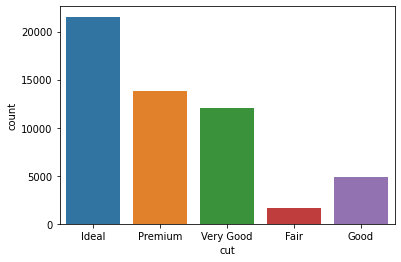

In [24]:
sns.countplot(df['cut'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='color', ylabel='count'>

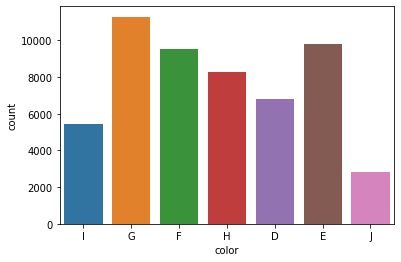

In [25]:
sns.countplot(df['color'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='clarity', ylabel='count'>

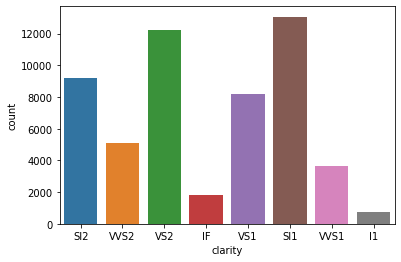

In [26]:
sns.countplot(df['clarity'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

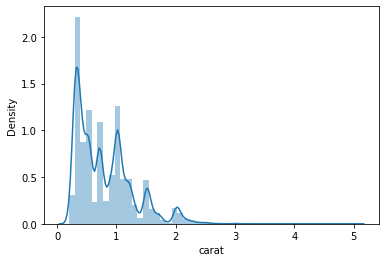

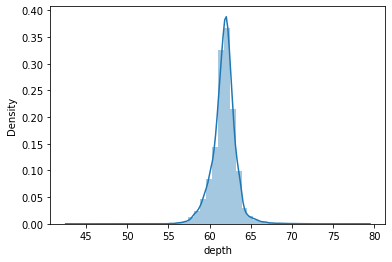

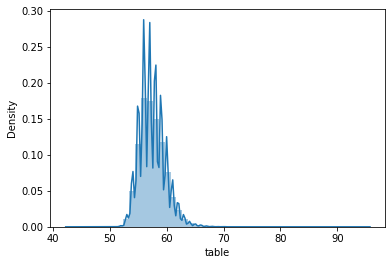

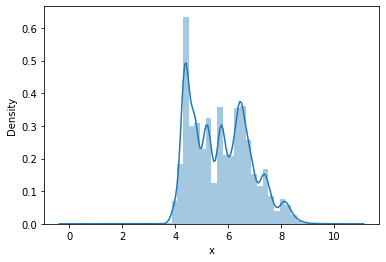

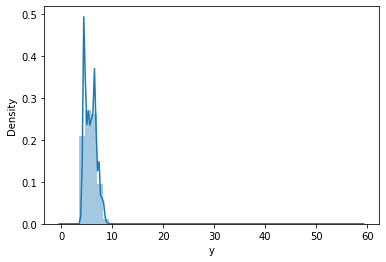

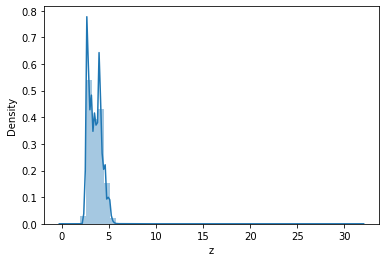

In [27]:
for x in n_col:
    plt.figure()
    sns.distplot(df[x])

<AxesSubplot:>

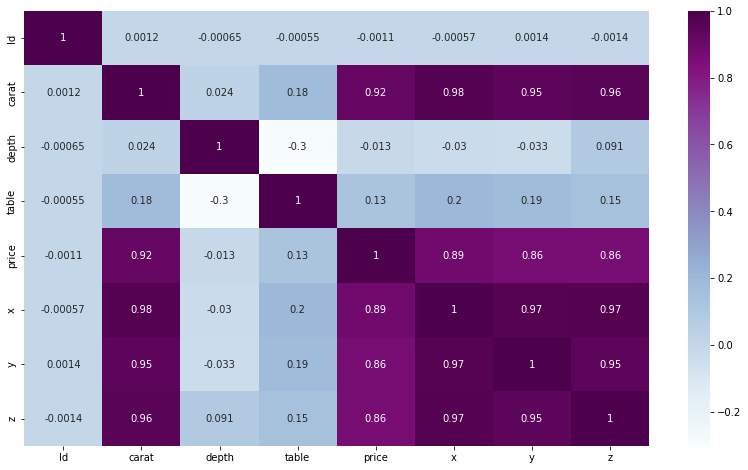

In [28]:
# train contain the price column , we need it to see the relation between price and the other columns

corr = train.corr()
plt.figure(figsize = (14,8))
sns.heatmap(corr, annot = True , cmap = "BuPu")

In [29]:
train.drop(['x','y','z'],axis=1,inplace=True)
df.drop(['x','y','z'],axis=1,inplace=True)

<AxesSubplot:>

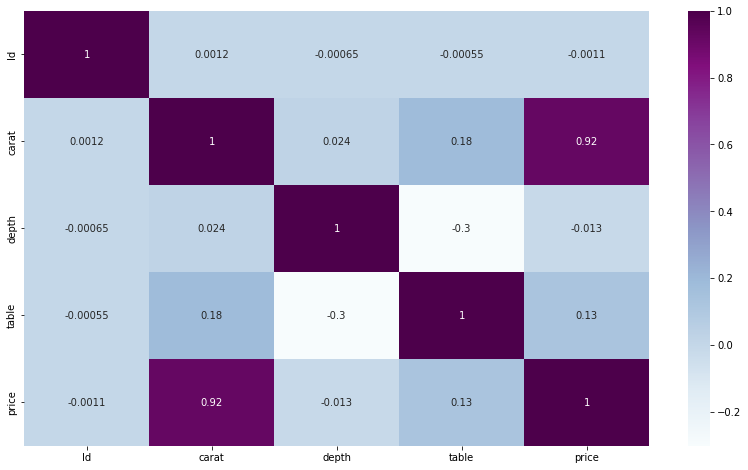

In [30]:
corr = train.corr()
plt.figure(figsize = (14,8))
sns.heatmap(corr, annot = True , cmap = "BuPu")

In [31]:
df.head()

,carat,cut,color,clarity,depth,table
0,1.06,Ideal,I,SI2,61.8,57.0
1,1.51,Premium,G,VVS2,60.9,58.0
2,0.32,Ideal,F,VS2,61.3,56.0
3,0.53,Ideal,G,VS2,61.2,56.0
4,0.70,Premium,H,VVS2,61.0,57.0


In [32]:
df.cut=df.cut.replace(['Fair','Good','Very Good','Premium','Ideal'],[1,2,3,4,5])   

In [33]:
df.clarity=df.clarity.replace(['I1', 'SI2', 'SI1','VS2','VS1', 'VVS2','VVS1','IF'],[1,2,3,4,5,6,7,8]) 

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ['color'])], remainder='passthrough')
data = columnTransformer.fit_transform(df)
column_name = columnTransformer.get_feature_names()
data =  pd.DataFrame(data, columns= column_name)
data.head(2)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,encoder__x0_E,encoder__x0_F,encoder__x0_G,encoder__x0_H,encoder__x0_I,encoder__x0_J,carat,cut,clarity,depth,table
0,0.0,0.0,0.0,0.0,1.0,0.0,1.06,5.0,2.0,61.8,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.51,4.0,6.0,60.9,58.0


In [35]:
num=['carat','depth','table']
from sklearn.preprocessing import StandardScaler
sub = data[num]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(sub), columns=sub.columns)

In [36]:
data =data.drop(num,axis =1)
data1 =  pd.concat([data, X], axis=1)
data1.head(3)

,encoder__x0_E,encoder__x0_F,encoder__x0_G,encoder__x0_H,encoder__x0_I,encoder__x0_J,cut,clarity,carat,depth,table
0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2.0,0.553580,0.035207,-0.204491
1,0.0,0.0,1.0,0.0,0.0,0.0,4.0,6.0,1.503363,-0.593146,0.243123
2,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,-1.008286,-0.313878,-0.652105


In [37]:
test_len

10788

In [38]:
train = data1[:train_len]
test=data1[train_len:]

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

In [40]:
import xgboost
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


In [41]:
model_params = {
    'mlp': {
        'model': MLPRegressor(random_state=1),
        'params' : {
            'alpha': [0.0001,0.0005,0.001,0.005],
            'max_iter': [250,350,500]
        }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            
            'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    
        'n_estimators': [100,190,290]
        }
    },
    'xgboost' : {
        'model': xgboost.XGBRegressor(),
        'params': {
            'gamma': [0.5, 1, 1.5, 2],
            'min_child_weight': [1, 5, 10],
            'eta': [ 0.01,0.05,0.1,0.3],
            'max_depth': [ 4,5,6],
            'n_estimators' : [200, 500, 900]
        }
    }
}

grid search took a lot of time, i couldn't pursue it

regr = MLPRegressor(random_state=1, max_iter=500, ).fit(x_train, y_train)
regr.score(x_test, y_test)

In [42]:
#modelx = xgboost.XGBRegressor(n_estimators=500)

In [43]:
#modelx.fit(x_train, y_train)
#modelx.score(x_test,y_test)


from sklearn.model_selection import GridSearchCV
scores = []



clf =  GridSearchCV(xgboost.XGBRegressor(n_estimators=500,eval_metric='rmse'), {
            
            
            'eta': [ 0.01,0.05,0.1],
           
           
        }, cv=3, return_train_score=False)
clf.fit(train, y)
scores.append({
        'model': 'xgboost',
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [44]:
m=xgboost.XGBRegressor(n_estimators=500,eta=0.05)

In [45]:
m.fit(x_train, y_train)
m.score(x_test,y_test)

0.9818977346333624

In [46]:
m.fit(train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.05, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0500000007,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [47]:
pred=m.predict(test)

In [48]:
#mysub=pd.DataFrame({'id':id,'price':np.exp(pred)})

In [49]:
mysub=pd.DataFrame({'id':id,'price':pred})

In [50]:
mysub.to_csv('submission.csv', index=False)